In [1]:
import pandas as pd

df = pd.read_csv('Data/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
cols=['Solar.R', 'Wind', 'Temp']
x = df[cols]
y = df['Result']

In [3]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

Text(0.5, 0, 'number of clusters')

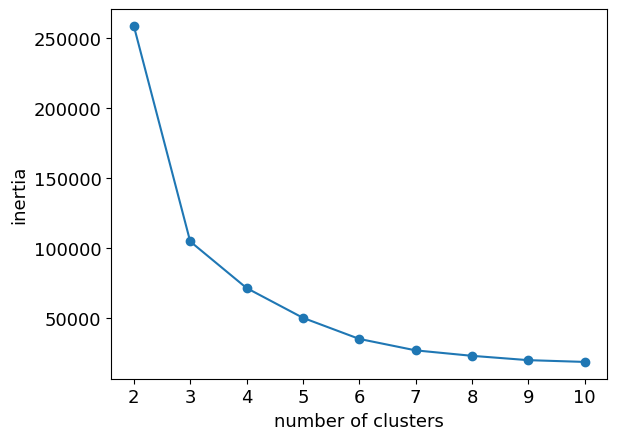

In [4]:
# 최적 클러스터 개수 구하기: Elbow 기법
# inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분에서 클러스터 수 결정
# inertia value: 군집화 후 각 중심점에서 군집 데이터간의 거리를 합산한 값. 작을수록 응집도가 높은 군집임

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2,11)
inertias = []
for n in clusters:
    # 모델생성
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(x_tr)
    inertias.append(model.inertia_)

plt.rcParams['font.size'] = 13
plt.plot(clusters, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')

In [6]:
model = KMeans(n_clusters=3, random_state=10)
print(model)
pred = model.fit_predict(x_tr)
print(pred[:5])
pred = model.predict(x_ts)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[2 0 1 0 2]
[1 1 2 1 0]


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# 군집화에서는 개별 라벨값보다 군집이 중요함
# 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄

# ai: i와 같은 군집에 속한 원소들의 평균 거리
# bi: i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi-ai) / max(ai, bi)
# 실루엣 계수가 클수록 좋은 모형임
# 군집 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음

from sklearn.metrics import silhouette_score
silhouette_score(x_ts, pred)

0.362807087165505

In [8]:
# cluster 갯수를 2로 설정
model = KMeans(n_clusters=2, random_state=10)
print(model)
pred = model.fit_predict(x_tr)
print(pred[:5])
pred = model.predict(x_ts)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 1 0 0]
[1 1 1 1 0]


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
silhouette_score(x_ts, pred)

0.6828285281281741

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

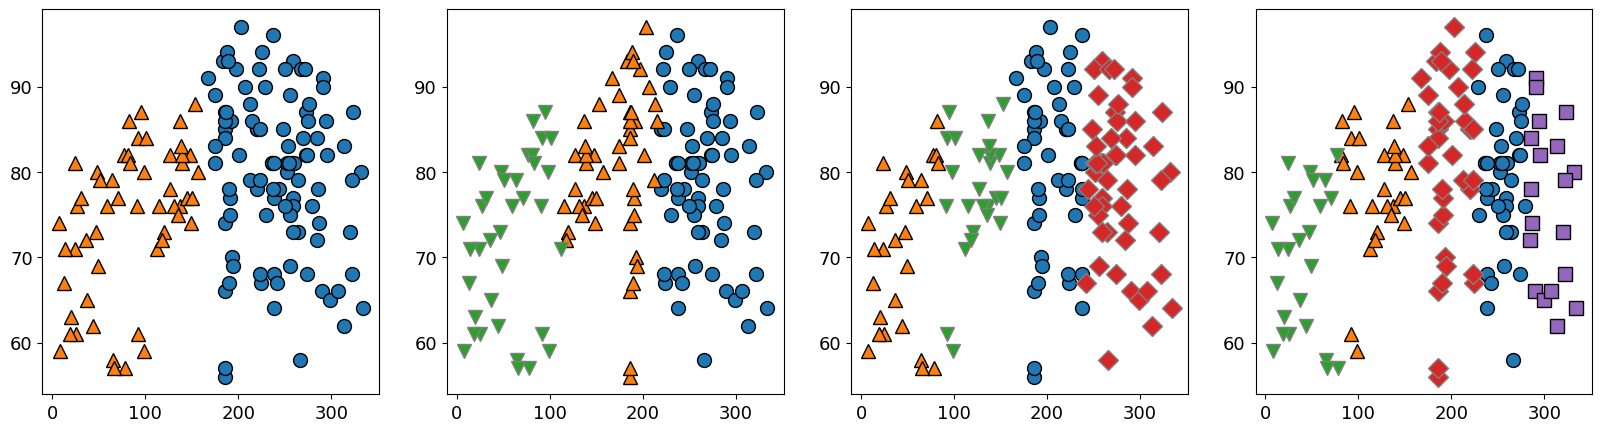

In [11]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
# 1행 4열의 서브플롯 생성

import mglearn

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우

idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(x['Solar.R'], x['Temp'], lbls, ax = axes[idx])
    idx +=1